# 
- **Answer Set** : NO. 04
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 96413315

QPSK Modulation in Rayleigh Fading Channel

In [1]:
clear;clc;close all;
%% create data
N=10;
data=randi([0,1],1,N);
%% 
fc=2;
T=1/fc;
t=0:.01:.99;
s0=cos(2*pi*fc*t);
s1=cos(2*pi*fc*t+pi/4);
s2=cos(2*pi*fc*t+pi);
s3=cos(2*pi*fc*t+3*pi/4);
data1=[];
for i=1:N;
    if data(i)==0;
        data1=[data1 zeros(1,length(t))];
    else
        data1=[data1 ones(1,length(t))];
    end
end
 
%% transmited signal
x=[];
for i=1:2:N;
    if data(i)==0 && data(i+1)==0;
        x=[x s0];
    end
    if data(i)==0 && data(i+1)==1;
        x=[x s1];
    end
    if data(i)==1 && data(i+1)==0;
        x=[x s2];
    end
    if data(i)==1 && data(i+1)==1;
        x=[x s3];
    end
end

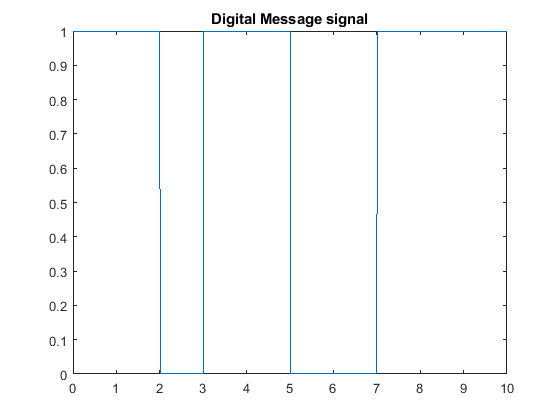

In [2]:
% plot transmited signal
figure()
t1=1:1:length(data1);
plot(t1/100,data1)
%axis([0 1000 0 1.5]);
title('Digital Message signal');

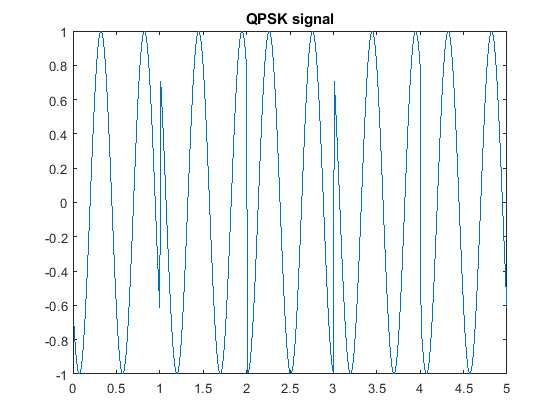

In [3]:
figure()
t2=1:1:length(x);
plot(t2/100,x)
%axis([0 500 -1.5 1.5])
title('QPSK signal');

In [4]:
%% fading chanal
y=[];
snrdb=-1;
snr=10^(snrdb/10);
for i=1:length(x);
    H=sqrt(.5)*( randn(1) + j.*randn(1));
    y=[y sqrt(snr)*abs(H)*x(i)];
end;
%% demodulator
d=[];
for i=1:N/2;
    a=1+100*(i-1);
    b=i*100;
    r=y(a:b);
    r00=r.*s0;
    r0=0;
    for j=1:length(r00);
        r0=r0+r00(i);
    end
    r0=r0/length(r00);
    r01=r.*s1;
    r1=0;
    for j=1:length(r01);
        r1=r1+r01(i);
    end
    r1=r1/length(r00);
    r10=r.*s2;
    r2=0;
    for j=1:length(r10);
        r2=r2+r10(i);
    end
    r2=r2/length(r00);
    r11=r.*s3;
    r3=0;
    for j=1:length(r11);
        r3=r3+r11(i);
    end
    r3=r3/length(r00);
    if (r0>r1 && r0>r2 && r0>r3);
        d=[d 0 0];
    end
    if (r1>r0 && r1>r2 && r1>r3);
        d=[d 0 1];
    end
    if (r2>r0 && r2>r1 && r2>r3);
        d=[d 1 0];
    end
    if (r3>r0 && r3>r1 && r3>r2);
        d=[d 1 1];
    end
end

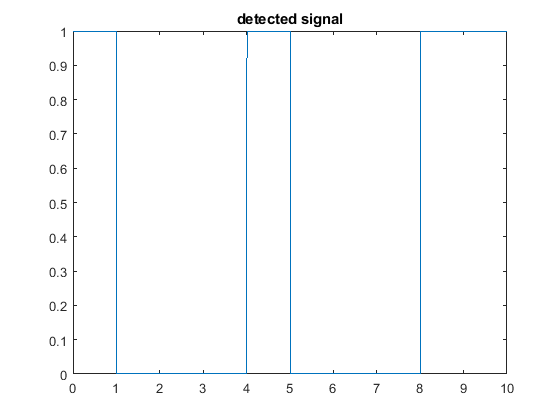

In [5]:
%% detected
d1=[];
for i=1:N;
    if d(i)==0
       d1=[d1 zeros(1,length(t))];
    else
        d1=[d1 ones(1,length(t))];
    end
end
figure()
plot(t1/100,d1)
title('detected signal')


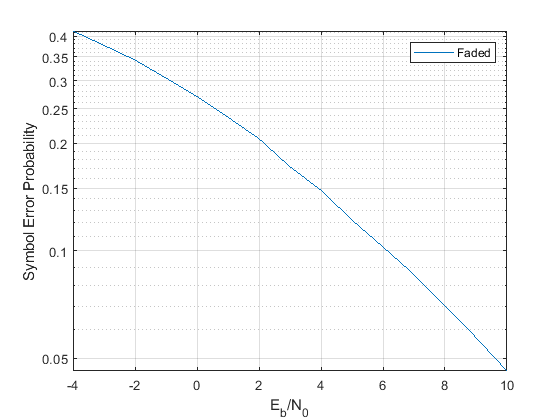

In [6]:
clear;close all;clc
iteration=10^5;
snrdb=[-4:10];
simsnr=10.^(snrdb/10);
erpr=zeros(1,length(snrdb));
for jjj=1:length(snrdb)
    snr=10^(snrdb(jjj)/10);
    count=0;
    for i=1:iteration
        bit1=round(rand(1));
        data1=2*bit1-1;
        bit2=round(rand(1));
        data2=2*bit2-1;
        H1 = sqrt(.5)*( randn(1) + j.*randn(1));
        H2 = sqrt(.5)*( randn(1) + j.*randn(1));
        noise1=randn(1);
        noise2=randn(1);
        received1=(sqrt(.5)*noise1) + sqrt(snr)*abs(H1)*data1;
        received2=(sqrt(.5)*noise2) + sqrt(snr)*abs(H2)*data2;
        if received1 >=0
            detected1=1;
        else 
            detected1=0;
        end
        if received2 >=0
            detected2=1;
        else 
            detected2=0;
        end
 %dtection=detected
    if ((detected1==0 && bit1==1)||(detected1==1 && bit1==0)||(detected2==0 && bit2==1)||(detected2==1 && bit2==0))
        count=count+1;
    end
    erpr(jjj)=count/iteration;
    end
end
semilogy(snrdb,erpr) 
xlabel('E_b/N_0')
ylabel('Symbol Error Probability')
grid on
legend('Faded');
